In [1]:
import random
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("weight-height.csv")

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


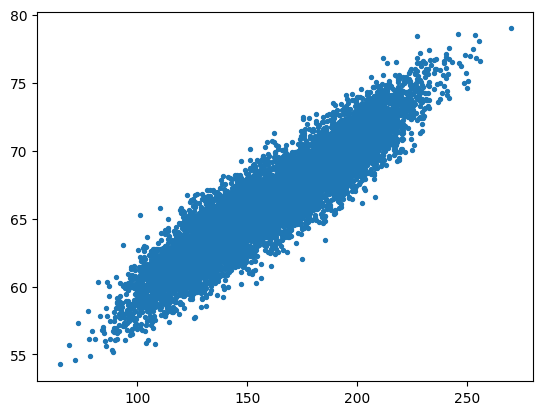

In [4]:
plt.scatter(df['Weight'], df['Height'] , s=8)


In [5]:
df.drop(columns=['Gender'], inplace=True)

In [6]:
df.rename(columns={'Height': 'weight','Weight':'height'}, inplace=True)
df.rename(columns={'height': 'Height','weight':'Weight'}, inplace=True)
df.head()

,Weight,Height
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [7]:
df['Height']= df['Height'].astype(int)
df['Weight']= df['Weight'].astype(int)

In [8]:
df.head()

,Weight,Height
0,73,241
1,68,162
2,74,212
3,71,220
4,69,206


In [9]:
## correlation
df.corr()

,Weight,Height
Weight,1.000000,0.921917
Height,0.921917,1.000000


<Axes: >

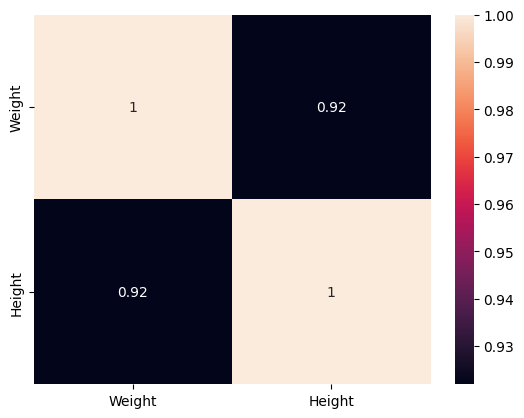

In [10]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True)

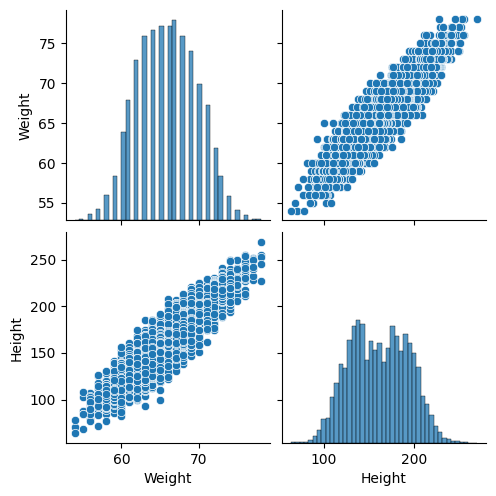

In [11]:
sns.pairplot(df)

In [12]:
## Independent and dependent features
X = df['Weight'] ## independent feature shoud be dataframe or 2 D array
y = df['Height'] ## this variable can be series or 1 D array
type(X)

pandas.core.series.Series

In [13]:
np.array(X).shape

(10000,)

In [14]:
X = df[['Weight']]

np.array(X).shape

(10000, 1)

In [15]:
np.array(y).shape

(10000,)

In [16]:
## Train test split

from sklearn.model_selection import train_test_split

In [17]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [18]:
X_train.shape

(7500, 1)

In [19]:
X_test.shape

(2500, 1)

In [20]:
## standardization
## height and weight are in different scale so we need to standardize the data
## we use z-scroe that converts  u=0 and std=1 ,z = (x - u) / s

In [21]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()

In [22]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)   ## we dont fit the test data we only transform it

In [40]:
## Apply linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [41]:
model.fit(X_train,y_train)

LinearRegression()

In [42]:
import pickle
pickle.dump(model, open('model.pkl','wb'))


In [43]:
scaler

StandardScaler()

In [44]:
pickle.dump(scaler, open('scaler.pkl','wb'))

In [25]:
print(f"Intercept or bias: {model.intercept_}")
print(f'slope or coefficient: {model.coef_}') ## y  = mx + c , m is the coef, y = b0 + b1x1 b1 is the coef 

Intercept or bias: 160.72746666666666
slope or coefficient: [29.50764302]


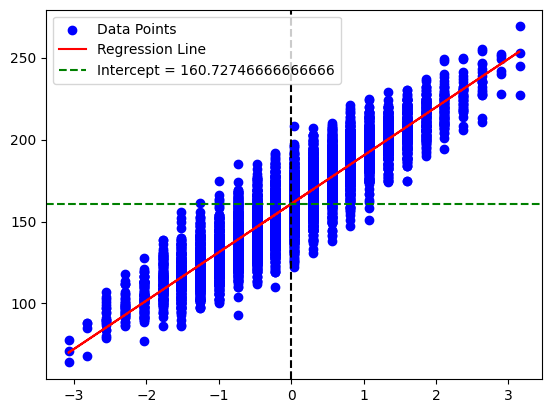

In [26]:
# plot best fit line

plt.scatter(X_train, y_train, color='blue', label='Data Points')
plt.plot(X_train, model.predict(X_train) , color='red', label='Regression Line')

plt.axhline(y=model.intercept_, color='green', linestyle='--', label=f'Intercept = {model.intercept_}')
plt.axvline(x=0, color='black', linestyle='--')  # X=0 line
plt.legend()
plt.show()


In [27]:
## Prediction test data 
## predict height output = intercept - coef_ * weight
## y_pred = b0 + b1 * x1 = model.intercept_ + model.coef_(X_test)

In [28]:
y_pred = model.predict(X_test)

In [29]:
## Performance metrics
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error

In [30]:
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse:.2f}')
rmse = r2_score(y_test, y_pred)
print(f'RMSE: {rmse:.2f}')
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae:.2f}')


MSE: 154.76
RMSE: 0.85
MAE: 9.90


In [31]:
# r square 
## formula => R^2 = 1 - (SSR/SST) SSR = sum of squared residuals, SST = sum of squared total 
## R^2 = 1 - (sum(y-y_pred)^2 / sum(y-y_mean)^2)
## R^2  = cofficient of determination

In [32]:
from sklearn.metrics import r2_score , accuracy_score
score_r2 = r2_score(y_test, y_pred)

In [33]:
score_r2 ### 85 %

0.8521391218197576

In [34]:
##### OLS linear regression

In [35]:
import statsmodels.api as sm
ml = sm.OLS(y_train, X_train).fit()

In [36]:
pre_val = ml.predict(X_test)
pre_val

array([ 16.50322621,  16.50322621,   1.19316417, ..., -44.73702195,
         8.84819519,   8.84819519], shape=(2500,))

In [37]:
print(ml.summary())


                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.032
Model:                            OLS   Adj. R-squared (uncentered):              0.032
Method:                 Least Squares   F-statistic:                              251.2
Date:                Thu, 23 Jan 2025   Prob (F-statistic):                    1.11e-55
Time:                        12:52:47   Log-Likelihood:                         -48762.
No. Observations:                7500   AIC:                                  9.753e+04
Df Residuals:                    7499   BIC:                                  9.753e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [38]:
### prediction for new data 
model.predict(scaler.transform([[66]])) ## weight ->  height


/workspaces/Machine-Learning/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([161.92063083])

In [39]:
df.sample(5)

,Weight,Height
5962,63,139
4124,68,183
6732,59,105
6872,66,151
7756,65,130
